<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.834898,45.534066,53.407391,37.298406,0.001443,172.076204,172.074501,0.001703
1,0.0,1.0,99.687763,28.220194,56.918625,62.407318,-0.001734,257.232166,257.233886,-0.001720
2,0.0,2.0,36.887118,45.196679,26.799149,89.048690,-0.000884,207.930752,207.931736,-0.000984
3,0.0,3.0,35.432353,26.807756,81.573440,35.412468,-0.001075,189.224942,189.225729,-0.000788
4,0.0,4.0,68.513739,66.093250,62.254429,72.519810,-0.000184,279.381044,279.381324,-0.000280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.195905,75.981998,22.490936,48.107237,-0.000231,240.775846,240.775814,0.000032
59996,999.0,56.0,57.091459,23.218608,81.073459,72.271473,0.003012,243.658011,243.655504,0.002507
59997,999.0,57.0,31.687079,36.526663,55.277043,27.927145,0.003824,161.421754,161.418245,0.003509
59998,999.0,58.0,94.083361,84.131805,94.804424,98.334129,-0.000617,381.353101,381.353497,-0.000395


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.834898  45.534066  53.407391  37.298406  0.001443  172.076204   
      1.0    99.687763  28.220194  56.918625  62.407318 -0.001734  257.232166   
      2.0    36.887118  45.196679  26.799149  89.048690 -0.000884  207.930752   
      3.0    35.432353  26.807756  81.573440  35.412468 -0.001075  189.224942   
      4.0    68.513739  66.093250  62.254429  72.519810 -0.000184  279.381044   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.195905  75.981998  22.490936  48.107237 -0.000231  240.775846   
      56.0   57.091459  23.218608  81.073459  72.271473  0.003012  243.658011   
      57.0   31.687079  36.526663  55.277043  27.927145  0.003824  161.421754   
      58.0   94.083361  84.131805  94.804424  98.334129 -0.000617  381.353101   
      59.0   26.027398  95.420889  64.546861  44.979916  0.000126  240.975191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    172.074501  0.001703  
      1.0    257.233886 -0.001720  
      2.0    207.931736 -0.000984  
      3.0    189.225729 -0.000788  
      4.0    279.381324 -0.000280  
...                 ...       ...  
999.0 55.0   240.775814  0.000032  
      56.0   243.655504  0.002507  
      57.0   161.418245  0.003509  
      58.0   381.353497 -0.000395  
      59.0   240.975024  0.000166  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.834898  45.534066  53.407391  37.298406  0.001443  172.076204   
      1.0    99.687763  28.220194  56.918625  62.407318 -0.001734  257.232166   
      2.0    36.887118  45.196679  26.799149  89.048690 -0.000884  207.930752   
      3.0    35.432353  26.807756  81.573440  35.412468 -0.001075  189.224942   
      4.0    68.513739  66.093250  62.254429  72.519810 -0.000184  279.381044   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.195905  75.981998  22.490936  48.107237 -0.000231  240.775846   
      56.0   57.091459  23.218608  81.073459  72.271473  0.003012  243.658011   
      57.0   31.687079  36.526663  55.277043  27.927145  0.003824  161.421754   
      58.0   94.083361  84.131805  94.804424  98.334129 -0.000617  381.353101   
      59.0   26.027398  95.420889  64.546861  44.979916  0.000126  240.975191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    172.074501  0.001703  
      1.0    257.233886 -0.001720  
      2.0    207.931736 -0.000984  
      3.0    189.225729 -0.000788  
      4.0    279.381324 -0.000280  
...                 ...       ...  
999.0 55.0   240.775814  0.000032  
      56.0   243.655504  0.002507  
      57.0   161.418245  0.003509  
      58.0   381.353497 -0.000395  
      59.0   240.975024  0.000166  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.834898,45.534066,53.407391,37.298406,0.001443,172.076204,172.074501,0.001703
1,0.0,1.0,99.687763,28.220194,56.918625,62.407318,-0.001734,257.232166,257.233886,-0.001720
2,0.0,2.0,36.887118,45.196679,26.799149,89.048690,-0.000884,207.930752,207.931736,-0.000984
3,0.0,3.0,35.432353,26.807756,81.573440,35.412468,-0.001075,189.224942,189.225729,-0.000788
4,0.0,4.0,68.513739,66.093250,62.254429,72.519810,-0.000184,279.381044,279.381324,-0.000280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.195905,75.981998,22.490936,48.107237,-0.000231,240.775846,240.775814,0.000032
59996,999.0,56.0,57.091459,23.218608,81.073459,72.271473,0.003012,243.658011,243.655504,0.002507
59997,999.0,57.0,31.687079,36.526663,55.277043,27.927145,0.003824,161.421754,161.418245,0.003509
59998,999.0,58.0,94.083361,84.131805,94.804424,98.334129,-0.000617,381.353101,381.353497,-0.000395


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.834898  45.534066  53.407391  37.298406  0.001443  172.076204   
      1.0    99.687763  28.220194  56.918625  62.407318 -0.001734  257.232166   
      2.0    36.887118  45.196679  26.799149  89.048690 -0.000884  207.930752   
      3.0    35.432353  26.807756  81.573440  35.412468 -0.001075  189.224942   
      4.0    68.513739  66.093250  62.254429  72.519810 -0.000184  279.381044   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.195905  75.981998  22.490936  48.107237 -0.000231  240.775846   
      56.0   57.091459  23.218608  81.073459  72.271473  0.003012  243.658011   
      57.0   31.687079  36.526663  55.277043  27.927145  0.003824  161.421754   
      58.0   94.083361  84.131805  94.804424  98.334129 -0.000617  381.353101   
      59.0   26.027398  95.420889  64.546861  44.979916  0.000126  240.975191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    172.074501  0.001703  
      1.0    257.233886 -0.001720  
      2.0    207.931736 -0.000984  
      3.0    189.225729 -0.000788  
      4.0    279.381324 -0.000280  
...                 ...       ...  
999.0 55.0   240.775814  0.000032  
      56.0   243.655504  0.002507  
      57.0   161.418245  0.003509  
      58.0   381.353497 -0.000395  
      59.0   240.975024  0.000166  

[60000 rows x 8 columns]

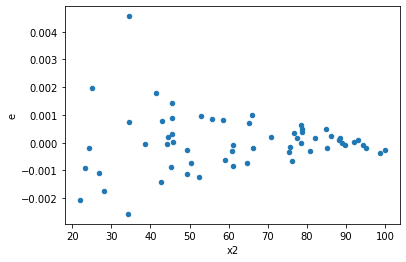

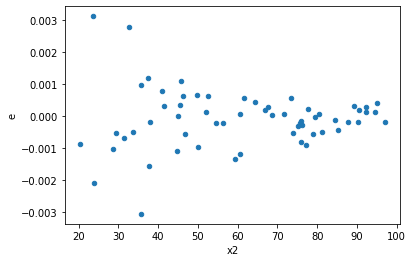

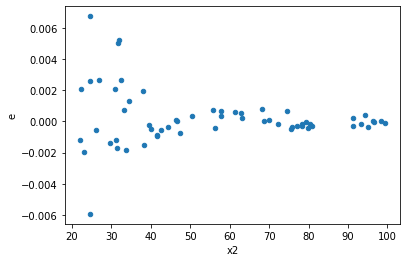

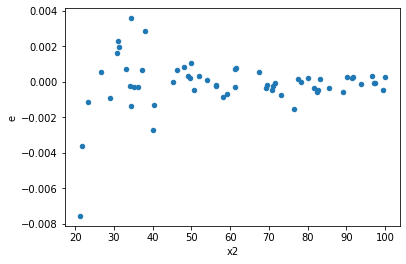

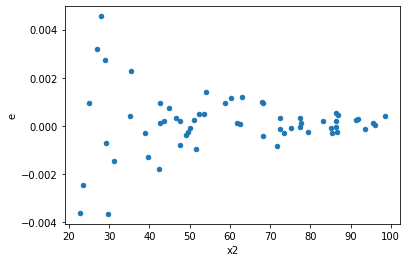

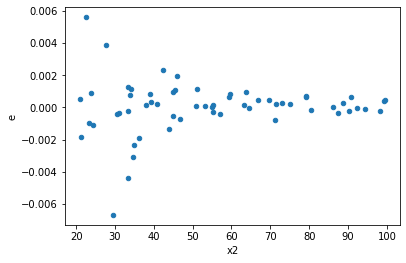

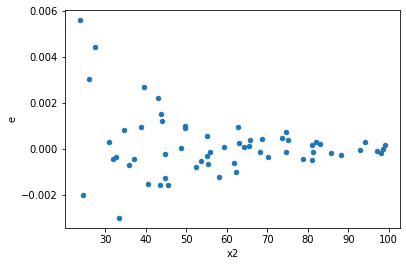

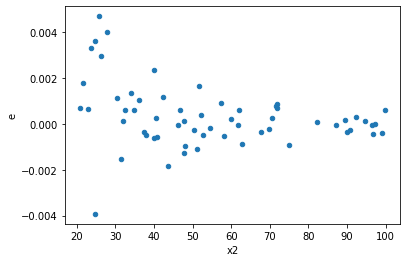

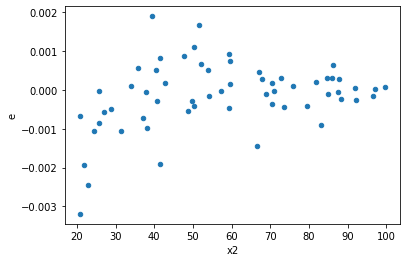

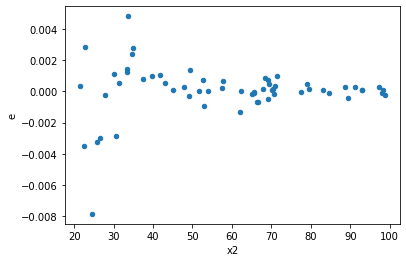

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,27.0,25.0,2.580425640265301e-05,7.48641007008265e-05,9.557132000982597e-07,2.9945640280330597e-06,3.133329149084872,0.005343986238047549,0.9973280068809762,0.0026719931190237745,Reject005=0 : Heteroscedasticity
5.0,38.0,14.0,5.549103224694381e-05,9.077247874668762e-05,1.460290322287995e-06,6.483748481906259e-06,4.440040711731532,0.0043311556909979565,0.997834422154501,0.0021655778454989782,Reject005=0 : Heteroscedasticity
8.0,23.0,29.0,3.263467752179432e-06,3.052629829156727e-05,1.4188990226867096e-07,1.052630975571285e-06,7.41864613859632,1.199859851697127e-06,0.9999994000700742,5.999299258485635e-07,Reject005=0 : Heteroscedasticity
10.0,29.0,23.0,2.2876628671057472e-05,6.726335477658533e-05,7.888492645192232e-07,2.9244936859384926e-06,3.7072908823980106,0.001970020427624064,0.999014989786188,0.000985010213812032,Reject005=0 : Heteroscedasticity
11.0,22.0,30.0,4.668110393678225e-06,0.00017967476128716368,2.1218683607628297e-07,5.989158709572123e-06,28.22587310467728,3.774758283725532e-14,0.9999999999999811,1.887379141862766e-14,Reject005=0 : Heteroscedasticity
12.0,19.0,33.0,2.6915784066493455e-05,7.215908451727686e-05,1.4166202140259713e-06,2.1866389247659652e-06,1.543560442746779,0.2674753984855598,0.8662623007572201,0.1337376992427799,Reject005=1 : Homoscedasticity
13.0,32.0,20.0,1.979149830871408e-05,4.572115865802381e-05,6.18484322147315e-07,2.2860579329011904e-06,3.696226162959521,0.0032309371349250604,0.9983845314325375,0.0016154685674625302,Reject005=0 : Heteroscedasticity
16.0,29.0,23.0,1.3088974318189231e-05,0.0001171814835972211,4.513439420065252e-07,5.094847112922657e-06,11.28816992706861,1.0610739198391173e-07,0.999999946946304,5.305369599195586e-08,Reject005=0 : Heteroscedasticity
17.0,25.0,27.0,8.447562149475025e-06,0.00010141613548108763,3.37902485979001e-07,3.7561531659662088e-06,11.116086213700232,2.241492946808421e-08,0.9999999887925353,1.1207464734042105e-08,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,21.0,3.8073017595797594e-05,1.4374040592646347e-05,1.2281618579289546e-06,6.844781234593499e-07,0.5573191505992404,0.13586028067350162,Reject005=1 : Homoscedasticity
1.0,25.0,27.0,2.9281844653114642e-05,1.0261581586118998e-05,1.1712737861245857e-06,3.800585772636666e-07,0.3244831240705669,0.006011096228628572,Reject005=0 : Heteroscedasticity
2.0,32.0,20.0,0.0001555992610718154,3.265361826512546e-06,4.862476908494231e-06,1.632680913256273e-07,0.03357714481695847,5.4729215700144814e-15,Reject005=0 : Heteroscedasticity
3.0,27.0,25.0,2.580425640265301e-05,7.48641007008265e-05,9.557132000982597e-07,2.9945640280330597e-06,3.133329149084872,0.005343986238047549,Reject005=0 : Heteroscedasticity
4.0,23.0,29.0,5.587079144351615e-05,2.5557060034715046e-05,2.4291648453702676e-06,8.812779322315533e-07,0.3627905013985264,0.014997230287576359,Reject005=0 : Heteroscedasticity
5.0,38.0,14.0,5.549103224694381e-05,9.077247874668762e-05,1.460290322287995e-06,6.483748481906259e-06,4.440040711731532,0.0043311556909979565,Reject005=0 : Heteroscedasticity
6.0,26.0,26.0,4.366657045008566e-05,4.0463072854522994e-05,1.6794834788494484e-06,1.556272032866269e-06,0.9266372979937934,0.8474496706496287,Reject005=1 : Homoscedasticity
7.0,25.0,27.0,4.475230321916792e-05,4.7482621125702e-05,1.790092128766717e-06,1.7586155972482223e-06,0.9824162505310939,0.9683344675527124,Reject005=1 : Homoscedasticity
8.0,23.0,29.0,3.263467752179432e-06,3.052629829156727e-05,1.4188990226867096e-07,1.052630975571285e-06,7.41864613859632,1.199859851697127e-06,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    626
Reject005=1 : Homoscedasticity      374
Name: Result_test, dtype: int64